### INTRODUCTION:
(300 Words)
- Brief Task
- Process of Analysis
- initial Scope
- Assumptions
- Data and problems with the data
- Expected Outcomes
  
Definition: 
How is the information is lacking? Airbnb isn't regulated as a data. (Data feminism)
Short-term rentals (what type of properties?)
What is the data we used?
A brief of the case studies and findings and conclusions

#### **PART 01 Data Loading:**

**The Work Mythology in Part 01 Data Loading and Intial Cleaning:**

>**Steps:**
>1. Import Packages
>2. Ensuring Folder Structure, a main file named data, and subfolders: Raw and Clean.
>3. Download files from the Web into a raw file in the home repository
>4. Additional Data loading, such as converting and unzipping a  file
>5. Identifying which columns to keep from raw file structure
>6. Build CLEAN versions in data/clean (from RAW)
>7.  Load from data/clean with selected columns
>8.  Clean column names function that does the initial cleaning on the data before in-depth analysis

Write about source of data > what it contains whats its problem and what do you wish to do with.

In [1]:
# Step 01 - Import packages needed for analysis
import os
import urllib.request
import zipfile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 02 - Ensuring Folder Structure: Create a main file named data and subfolders named raw and clean.
def ensure_data_folders():
    folders = ["data/raw", "data/clean"]
    
    for folder in folders:
        if not os.path.isdir(folder):
            os.makedirs(folder)
            print(f"Created folder: {folder}")
        else:
            print(f"Folder already exists: {folder}")

    print("--" * 30)

ensure_data_folders()

Created folder: data/raw
Created folder: data/clean
------------------------------------------------------------


In [3]:
# Step 03 - Download files from the Web into a raw file on the home repository
# Please Note: The gitignore file includes the whole of the data file so that you won't see this file in the main repo

# function that downloads  files into raw only if they don't exist
def download_if_missing(url, local_name):
    dest = os.path.join("data", "raw", local_name)
    
    print(f"Let me check: {local_name}")

    if os.path.isfile(dest):
        print("File already exists — skipping download.")
    else:
        print(f"Downloading from:\n    {url}")
        urllib.request.urlretrieve(url, dest)
        print("Download complete — saved.")

    print("--" * 20)
    return dest 

# attribute url path to a variable Source: Prof. Jon Reades from the CASA department at UCL
base = "https://orca.casa.ucl.ac.uk/~jreades/data/"

# files we wish to download  from that path 
orca_files = [
    
    "20250615-London-listings.csv.gz",
    # ^ Airbnb listings from calendar "screenshot" 15/June/2025 (comma-separated values)
    "MSOA-2011.gpkg" 
    # ^ Middle-Layer Super Output Area for London (Spatial file)
]

# Extra files we saw necessary to add for further analysis (Outside the scope offered by Prof. Reades)
extra_files = {
    
    "housing_msoa.csv":
        "https://data.london.gov.uk/download/2z0yn/20264159-36cb-4aa2-8371-ae884ae83e88/msoa-data.csv",
        # ^ Housing data by MSOA boundaries to evaluate how many households are in a jurisdictional boundary (comma-separated values)    
        
    "londonrentalstatsaccessibleq22024.xlsx":
        "https://www.ons.gov.uk/file?uri=/economy/inflationandpriceindices/adhocs/2224privaterentalmarketinlondonjuly2023tojune2024/londonrentalstatsaccessibleq22024.xlsx",
       # ^ Average monthly Rent according to Borough (Excel must transform to comma-separated values)
   
    "london_boroughs.zip":
        "https://data.london.gov.uk/download/20od9/08d31995-dd27-423c-a987-57fe8e952990/London-wards-2018.zip",
        # ^ Borough Boundary of London (Spatial file)
    
    "council_tax_borough.xlsx":
        "https://data.london.gov.uk/download/expnl/59cc7c37-da8f-4158-bc47-491c3d167b05/council-tax-bands-borough.xlsx"
        # ^ Council Tax per Borough Band D (Excel must transform to comma-separated values)
}

local_paths = [] # Open List for later for-loop

# Orca files download to raw file
print("!STARTING ORCA DOWNLOADS!")
for fname in orca_files:
    url = base + fname
    path = download_if_missing(url, fname) 
    local_paths.append(path)

# Extra files download to raw file
print("!STARTING DATASTORE DOWNLOADS!")
for local_name, url in extra_files.items():
    path = download_if_missing(url, local_name)
    local_paths.append(path)

!STARTING ORCA DOWNLOADS!
Let me check: 20250615-London-listings.csv.gz
    https://orca.casa.ucl.ac.uk/~jreades/data/20250615-London-listings.csv.gz
Download complete — saved.
----------------------------------------
Let me check: MSOA-2011.gpkg
    https://orca.casa.ucl.ac.uk/~jreades/data/MSOA-2011.gpkg
Download complete — saved.
----------------------------------------
!STARTING DATASTORE DOWNLOADS!
Let me check: housing_msoa.csv
    https://data.london.gov.uk/download/2z0yn/20264159-36cb-4aa2-8371-ae884ae83e88/msoa-data.csv
Download complete — saved.
----------------------------------------
Let me check: londonrentalstatsaccessibleq22024.xlsx
    https://www.ons.gov.uk/file?uri=/economy/inflationandpriceindices/adhocs/2224privaterentalmarketinlondonjuly2023tojune2024/londonrentalstatsaccessibleq22024.xlsx
Download complete — saved.
----------------------------------------
Let me check: london_boroughs.zip
    https://data.london.gov.uk/download/20od9/08d31995-dd27-423c-a987-57fe8e

In [4]:
# Step 04 -  Additional Data loading, such as converting Excel to CSV and unzipping a file
#            in the condition that the files haven't done this

# Convert the Rent file from Excel to CSV
print("!CONVERTING RENT EXCEL (Number 2 sheet) TO CSV!")
    
excel_path = "data/raw/londonrentalstatsaccessibleq22024.xlsx"
csv_path   = "data/raw/londonrentalstatsaccessibleq22024.csv"

if os.path.isfile(csv_path):
    print(f"CSV already exists, skipping conversion: {csv_path}")
else:
    if not os.path.isfile(excel_path):
        print(f"Excel file not found: {excel_path}")
    else:
        rents_xlsx = pd.read_excel(
            excel_path,
            sheet_name="2",
            skiprows = 2
        )
        rents_xlsx.to_csv(csv_path, index=False)
        print(f"Converted Excel to CSV: {csv_path}")

print("--" * 20)


# Convert Council Tax file from Excel to CSV
print("!CONVERTING COUNCIL TAX EXCEL (2024-2025) TO CSV!")

excel_path = "data/raw/council_tax_borough.xlsx"
csv_path   = "data/raw/council_tax_borough.csv"

if os.path.isfile(csv_path):
    print(f"CSV already exists, skipping conversion: {csv_path}")
else:
    if not os.path.isfile(excel_path):
        print(f"Excel file not found: {excel_path}")
    else:
        tax_xlsx = pd.read_excel(
            excel_path,
            sheet_name="2024-25"
        )
        tax_xlsx.to_csv(csv_path, index=False)
        print(f"Converted Excel to CSV: {csv_path}")

print("--" * 20)

print("!UNZIPPING LONDON BOROUGHS SHAPEFILE!")

# unzipping Shape File of London Borough
zip_path = "data/raw/london_boroughs.zip"
if os.path.isfile(zip_path):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall("data/raw/")
    print("Unzipped london_boroughs.zip")
else:
    print("Zip file not found: data/raw/london_boroughs.zip")

print("--" * 20)

!CONVERTING RENT EXCEL (Number 2 sheet) TO CSV!
Converted Excel to CSV: data/raw/londonrentalstatsaccessibleq22024.csv
----------------------------------------
!CONVERTING COUNCIL TAX EXCEL (2024-2025) TO CSV!
Converted Excel to CSV: data/raw/council_tax_borough.csv
----------------------------------------
!UNZIPPING LONDON BOROUGHS SHAPEFILE!
Unzipped london_boroughs.zip
----------------------------------------


In [5]:
# Step 05 - Identifying which columns to keep from raw file structure

# Columns needed for listings 
cols_listings = [
    'id', 'name', 'host_id', 'host_is_superhost', 
    'host_total_listings_count',
    'neighbourhood_cleansed', 'latitude', 'longitude', 
    'property_type', 'room_type', 'bedrooms', 'accommodates', 
    'price', 'minimum_nights', 'maximum_nights', 
    'minimum_minimum_nights','maximum_minimum_nights',
    'minimum_maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
    'availability_365',
    'number_of_reviews', 
    'number_of_reviews_ltm',
    'first_review', 'last_review',
    'review_scores_rating', 
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'reviews_per_month',
    'estimated_revenue_l365d',
    'estimated_occupancy_l365d'
]

# Housing (2011 only)*** The housing  is only from 2011 add as a problem for the data
cols_housing = ["Middle Super Output Area",
                 "MSOA Name",
                 "Households (2011);All Households;"
                 ]

# Council tax: band D comparison as it is the Band used as reference by the GLA !!! ADD REF
cols_tax = [
    "Code",
    "Local authority",
    "Band D"
]

In [6]:
# Step 06 -  Build CLEAN versions in data/clean (from RAW)
# Each File goes through the raw version and into clean which would allow us to manipulate the data without losing the raw

print("!CREATING CLEAN VERSIONS!")

# Save listings into a clean file
raw_listings_path = "data/raw/20250615-London-listings.csv.gz"
clean_listings_path = "data/clean/20250615-London-listings.csv.gz"

if not os.path.isfile(clean_listings_path):
    listings_raw = pd.read_csv(
        raw_listings_path,
        compression="gzip",
        encoding="latin1",
        low_memory=False
    )
    listings = listings_raw[cols_listings]
    listings.to_csv(
        clean_listings_path,
        index=False,
        compression="gzip"
    )
    print("Saved cleaned listings to data/clean")
else:
    print("Clean listings already exist, skipping.")

# save MSOA into clean file
raw_msoa_path = "data/raw/MSOA-2011.gpkg"
clean_msoa_path = "data/clean/MSOA-2011.gpkg"

if not os.path.isfile(clean_msoa_path):
    msoa = gpd.read_file(raw_msoa_path)
    msoa.to_file(clean_msoa_path, driver="GPKG")
    print("Saved MSOA to data/clean")
else:
    print("Clean MSOA already exists, skipping.")

# Save Rent into clean file (already converted to CSV in raw)
raw_rent_path = "data/raw/londonrentalstatsaccessibleq22024.csv"
clean_rent_path = "data/clean/londonrentalstatsaccessibleq22024.csv"

if not os.path.isfile(clean_rent_path):
    rent = pd.read_csv(raw_rent_path, encoding="latin1", low_memory=False)
    rent.to_csv(clean_rent_path, index=False)
    print("Saved cleaned rent to data/clean")
else:
    print("Clean rent already exists, skipping.")

# Save Housing into clean file
raw_housing_path = "data/raw/housing_msoa.csv"
clean_housing_path = "data/clean/housing_msoa.csv"

if not os.path.isfile(clean_housing_path):
    housing_raw = pd.read_csv(raw_housing_path, encoding="latin1", low_memory=False)
    housing = housing_raw[cols_housing]
    housing.to_csv(clean_housing_path, index=False)
    print("Saved cleaned housing to data/clean")
else:
    print("Clean housing already exists, skipping.")

# Save Borough and Wards into a clean file
borough_clean_dir = "data/clean/London-wards-2018_ESRI"
os.makedirs(borough_clean_dir, exist_ok=True)

# this path depends on how the zip unzips 
raw_borough_path = "data/raw/London-wards-2018_ESRI/London_Ward.shp"

clean_borough_path = os.path.join(borough_clean_dir, "London_Ward.shp")

if not os.path.isfile(clean_borough_path):
    borough = gpd.read_file(raw_borough_path)
    borough.to_file(clean_borough_path)
    print("Saved borough shapefile to data/clean")
else:
    print("Clean borough shapefile already exists, skipping.")

# Save Council Tax file into clean file
raw_tax_path = "data/raw/council_tax_borough.csv"
clean_tax_path = "data/clean/council_tax_borough.csv"

if not os.path.isfile(clean_tax_path):
    council_tax_raw = pd.read_csv(raw_tax_path, encoding="latin1", low_memory=False)
    council_tax = council_tax_raw[cols_tax]
    council_tax.to_csv(clean_tax_path, index=False)
    print("Saved cleaned council tax to data/clean")
else:
    print("Clean council tax already exists, skipping.")

print("**All cleaned files saved to data/clean/**")


!CREATING CLEAN VERSIONS!
Saved cleaned listings to data/clean
Saved MSOA to data/clean
Saved cleaned rent to data/clean
Saved cleaned housing to data/clean
Saved borough shapefile to data/clean
Saved cleaned council tax to data/clean
**All cleaned files saved to data/clean/**


In [7]:
# Step 07 -  Load from data/clean with selected columns and attirbute to a value 

print("!LOADING FILES (SELECTED COLUMNS ONLY)!")

# Load Listings
listings = pd.read_csv(
    "data/clean/20250615-London-listings.csv.gz",
    compression="gzip",
    usecols=cols_listings,
    encoding="latin1",
    low_memory=False
)
print(f"Step 01: listings loaded: {listings.shape[0]:,} rows, {listings.shape[1]} columns")

# Load MSOA
msoa = gpd.read_file("data/clean/MSOA-2011.gpkg")
print(f"Step 02: msoa loaded: {msoa.shape[0]:,} polygons, {msoa.shape[1]} columns")

# Rent
rent = pd.read_csv(
    "data/clean/londonrentalstatsaccessibleq22024.csv",
    encoding="latin1",
    low_memory=False
)
print(f"Step 03: rent loaded: {rent.shape[0]:,} rows, {rent.shape[1]} columns")

# Load Housing
housing = pd.read_csv(
    "data/clean/housing_msoa.csv",
    usecols=cols_housing,
    encoding="latin1",
    low_memory=False
)
print(f"Step 04: housing loaded: {housing.shape[0]:,} rows, {housing.shape[1]} columns")

# Load Borough boundary polygons
borough = gpd.read_file("data/clean/London-wards-2018_ESRI/London_Ward.shp")
print(f"Step 05: borough loaded: {borough.shape[0]:,} polygons, {borough.shape[1]} columns")

# Load Council Tax
council_tax = pd.read_csv(
    "data/clean/council_tax_borough.csv",
    usecols=cols_tax,
    encoding="latin1",
    low_memory=False
)
print(f"Step 06: council tax loaded: {council_tax.shape[0]:,} rows, {council_tax.shape[1]} columns")


# Print this when done
print("**All selected files successfully loaded.**")

!LOADING FILES (SELECTED COLUMNS ONLY)!
Step 01: listings loaded: 96,651 rows, 34 columns
Step 02: msoa loaded: 983 polygons, 13 columns
Step 03: rent loaded: 198 rows, 7 columns
Step 04: housing loaded: 984 rows, 3 columns
Step 05: borough loaded: 657 polygons, 7 columns
Step 06: council tax loaded: 34 rows, 3 columns
**All selected files successfully loaded.**


In [8]:
# Step 08 - Clean column names function that does the initial cleaning on the data before in-depth analysis

# Create a function clean_names that runs through the data frame
def clean_names(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^\w]", "", regex=True)
        .str.replace(",", "", regex=False)
    )
    return df

# turn data frame into a dictionary for fast cleaning
dfs = {
    "listings": listings,
    "msoa": msoa,
    "rent": rent,
    "housing": housing,
    "borough": borough,
    "council_tax": council_tax
}
for name, frame in dfs.items():
    dfs[name] = clean_names(frame)
    print(f"Cleaned column names for: {name}")

# Reverse the dictionary back to individual data frames 
listings     = dfs["listings"]
msoa         = dfs["msoa"]
rent         = dfs["rent"]
housing      = dfs["housing"]
borough      = dfs["borough"]
council_tax  = dfs["council_tax"]

Cleaned column names for: listings
Cleaned column names for: msoa
Cleaned column names for: rent
Cleaned column names for: housing
Cleaned column names for: borough
Cleaned column names for: council_tax


In [9]:
# in depth cleaning of listings
probs = listings.isnull().sum(axis=1)
listings.isnull().sum(axis=1).sort_values(ascending=False).head(10)

5155     8
81967    8
52385    8
87339    8
3646     8
46883    8
75068    8
81475    8
54661    8
6122     8
dtype: int64

In [10]:
print(f"listings contains {listings.shape[0]:,} rows.")
cutoff = 5
listings.drop(probs[probs > cutoff].index, inplace=True)
print(f"listings contains {listings.shape[0]:,} rows.")

listings contains 96,651 rows.
listings contains 86,483 rows.


In [11]:
listings.isnull().sum(axis=0).sort_values(ascending=False)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86483 entries, 0 to 96650
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            86483 non-null  int64  
 1   name                                          86483 non-null  object 
 2   host_id                                       86483 non-null  int64  
 3   host_is_superhost                             84736 non-null  object 
 4   host_total_listings_count                     86451 non-null  float64
 5   neighbourhood_cleansed                        86483 non-null  object 
 6   latitude                                      86483 non-null  float64
 7   longitude                                     86483 non-null  float64
 8   property_type                                 86483 non-null  object 
 9   room_type                                     86483 non-null  obje

In [12]:
# boolean values
bools = ['host_is_superhost']
for b in bools:
    print(f"Converting {b} to boolean")
    listings[b] = listings[b].replace({'f':False, 't':True}).astype('bool')

# categories
cats = ['property_type','room_type']
for c in cats:
    print(f"Converting {c} to categort")
    listings[c] = listings[c].astype('category')

# dates
dates = ['first_review','last_review']
for d in dates:
    print(f"Converting {d} to date")
    listings[d] = pd.to_datetime(listings[d])

# strings
money = ['price']
for m in money:
    print(f"Converting {m} to float")
    listings[m] = (
        listings[m]
        .astype(str)            # convert to string so .str works
        .str.replace('$', '', regex=False)
        .str.replace(',', '')
        .replace('nan', float('nan'))  # optional: fix 'nan' strings
        .astype(float))

# integers
ints  = ['id','host_id','host_total_listings_count','bedrooms','accommodates', 'minimum_nights','maximum_nights','availability_365']
for i in ints:
    print(f"Converting {i} to integer")
    try:
        listings[i] = listings[i].astype('float').astype('int')
    except ValueError as e:
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        listings[i] = listings[i].astype('float').astype(pd.UInt16Dtype())

listings.info()

Converting host_is_superhost to boolean
Converting property_type to categort
Converting room_type to categort
Converting first_review to date
Converting last_review to date
Converting price to float
Converting id to integer
Converting host_id to integer
Converting host_total_listings_count to integer
  - !!!Converting to unsigned 16-bit integer!!!
Converting bedrooms to integer
  - !!!Converting to unsigned 16-bit integer!!!
Converting accommodates to integer
Converting minimum_nights to integer
Converting maximum_nights to integer
Converting availability_365 to integer
<class 'pandas.core.frame.DataFrame'>
Index: 86483 entries, 0 to 96650
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            86483 non-null  int64         
 1   name                                          86483 non-null  object

In [13]:
##### Make Sure Everything is functioning > Don't print this, please 
borough.columns
# Just to make sure its clean and not manipulated
# ax = borough.plot(edgecolor='black', facecolor='none', figsize=(6,6))

Index(['name', 'gss_code', 'district', 'lagsscode', 'hectares', 'nonld_area',
       'geometry'],
      dtype='object')

clean borough shapefile: (33, 3)
geom types: Polygon    33
Name: count, dtype: int64


,borough_code,geometry,borough_name
0,E09000001,"POLYGON ((-0.08904 51.50803, -0.08948 51.50809...",city and county of the city of london
1,E09000002,"POLYGON ((0.09862 51.51492, 0.09811 51.5152, 0...",barking and dagenham
2,E09000003,"POLYGON ((-0.22265 51.56353, -0.22341 51.56413...",barnet
3,E09000004,"POLYGON ((0.12634 51.41472, 0.12628 51.41477, ...",bexley
4,E09000005,"POLYGON ((-0.25603 51.53395, -0.25612 51.53434...",brent


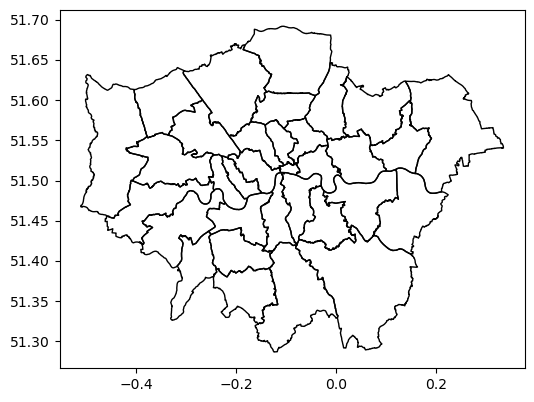

In [14]:
# Step 02 -  Clean the Borough Shapefile ^^^^ MOVE UP

# Ensure CRS is correct to match Airbnb points later
borough = borough.to_crs(epsg=4326)

# Extract borough code from lagsscode
borough['borough_code'] = (
    borough['lagsscode']
    .astype(str)
    .str.strip())

# Clean borough name from shapefile
borough['borough_name'] = (
    borough['district']
    .astype(str)
    .str.lower()
    .str.replace("&", "and", regex=False)
    .str.replace("-", " ", regex=False)
    .str.strip())

# Keep only essential columns
borough_min = borough[['borough_code', 'borough_name', 'geometry']].copy()

# Dissolve all pieces per borough_code into a single geometry (outer boundary of borough)
borough_shp = borough_min.dissolve(by='borough_code')

# Bring borough_code back as a normal column
borough_shp = borough_shp.reset_index()

print("clean borough shapefile:", borough_shp.shape)
print("geom types:", borough_shp.geom_type.value_counts())
display(borough_shp.head())

# Quick visual check
ax = borough_shp.plot(edgecolor='black', facecolor='none', figsize=(6, 6))

# ---- Output Data -----
# borough_shp = Which is a cleaned, outer boundary (dissolved) shape file of the boroughs.

#### **Question 1: Is AirBNB out of control in London?**

  (300 Words)
- Short into brief
- assumptions
- problems with data
- steps
- outcome expected + Summary for each graph + titles 
- Summary general for question + Review for policy

1. What do we consider out of control?
   - Occupancy of listing:
     > Under London’s regulatory framework, a property may not be rented more than 90 nights a year as short-term rental without applying for a change of use, from residential to temporary acommodation.
- Thus, we want to focus on listings which have an annual occupancy ... i.e. **illegal listings**. We calculate the approximate occupancy for each listing in the last year
- We then calculate the total revenue generated from illegal airbnb activity in the last year

2. What are the types of Airbnbs that are out of control?
- Entire homes/apartments vs single rooms
- Hosts with multiple vs single listings
  
3. Where is it out of control? Is it the same for the whole city?
- Map of illegal revenue

What is 'out of control'? --- a situation in which the number of Airbnb short-term rentals in an area becomes large enough to significantly reduce the availability of long term housing, relative to the number of permanent households, and the capacity of the city to provide new housing units. According to Minton (2023), London has over 81,000 Airbnb listings, more than 50,000 of which are entire homes. This means that approximately one in every 74 homes in London is advertised as a short-term rental, raising concerns about pressure on the long-term housing market.

Still to consider:
- How Airbnb supply has evolved over time. Using the year of the first review as a proxy for the year in which a listing becomes active --> Instead of a histogram, we can just add a number saying the number of new listings has increased by xxx % in the last xxx years.

**

Previous suggestions:
- 1.4 Can we evaluate the price in revenue and compare each category?
Rental Price: Compare the rent of Airbnb vs council/regular houses to see the difference? (OUTOFCONTROL?)
**This question is still to be answered, we have the Local Authority Average Rents data set, actually one of my readings was about the rent gap in the context of gentrification, and i think it could be really usefull! Basically, it explains that the rent gap theory is the difference of what a landlord is making in the moment by renting in the unit, and the potential income it could generate if some investments were made. It is used to see if its woth to invest (not only in a unit but also as a developer to invest in urban regeneration of some area). So, with Airbnb a new rent gap is introduced, as you could make so much more income without doing anything to the apartment or to the area. This creates a economic incentive to shift properties from normal rent to airbnb. In areas where this Airbnb-based rent gap is particularly high, landlords are more likely to convert units into full-time short-term rentals, which can accelerate processes of displacement and gentrification. I'll try to make a more detail summary with quotations to use for this question**

#### Growth of full-time rentals

Growth tendency in airbnb full-time short-term rentals

The dataset does not include the exact date when a property was first listed on Airbnb. However, it does contain the date of the first review. Because hosts typically receive their first review shortly after a guest stays for the first time, **the year of the first review is generally a good proxy for the year the listing became active.**

For this reason, we use the year of the first review as an estimate of the listing’s “introduction year.” Plotting a histogram of these years allows us to visualize how many new Airbnb listings entered the market each year and to observe the growth of the platform over time.

The histogram shows a clear surge in the number of new listings from 2021 onwards, quickly recovering from the Covid-19 pandemic. The strong growth in recent years suggests that Airbnb supply has been accelerating rather than stabilizing.

In [15]:
# Subset: entire homes available for more than 90 days in a year
listings_fulltime = listings[
    (listings["availability_365"] > 90) &
    (listings["room_type"] == "Entire home/apt")
].copy()

In [16]:
#select only the year
listings_fulltime["year_first_review"] = listings_fulltime["first_review"].dt.year.astype("Int64")
listings_fulltime["year_first_review_old"] = listings_fulltime["first_review"].dt.year

In [17]:
listings_fulltime.sample(1).T

,52353
id,889603235689872128
name,Stunning 2 Bedroom Garden Flat
host_id,284311830
host_is_superhost,True
host_total_listings_count,1
neighbourhood_cleansed,Lambeth
latitude,51.45076
longitude,-0.1209
property_type,Entire rental unit
room_type,Entire home/apt


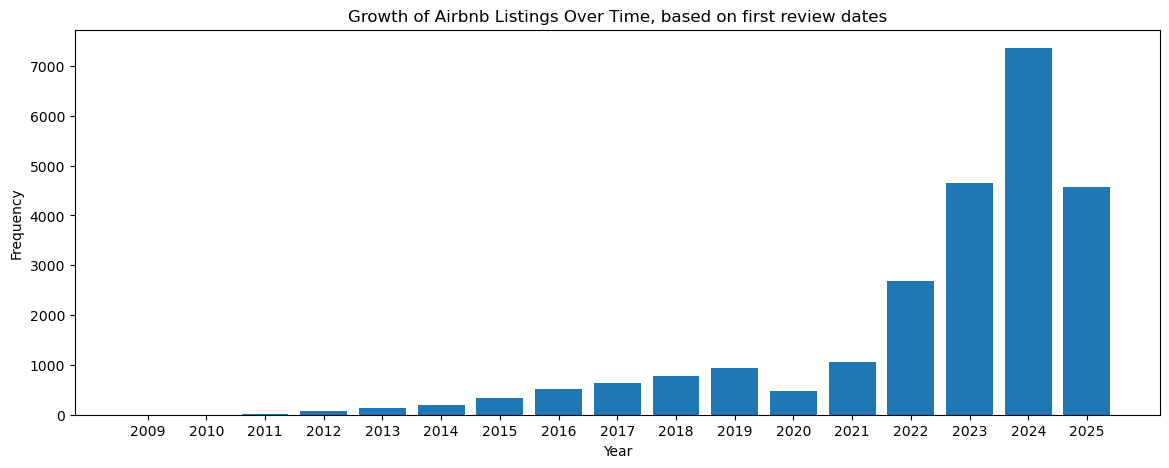

In [18]:
counts = listings_fulltime["year_first_review"].value_counts().sort_index()

plt.figure(figsize=(14,5))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Listings by Year")
plt.title("Growth of Airbnb Listings Over Time, based on first review dates")
plt.show()

In [19]:
#Convert listings fulltime df into Geopandas

listings_fulltime = gpd.GeoDataFrame(
    listings_fulltime,
    geometry=gpd.points_from_xy(
        listings_fulltime.longitude,
        listings_fulltime.latitude
    ),
    crs="EPSG:4326"    
)

In [20]:
#Reproject to Britain National Grid ####^^^ make sure all coordinates 27700
listings_fulltime = listings_fulltime.to_crs(epsg=27700)

In [21]:
#merge the MSOA geometry from the GeoPackage with the household data so that each polygon includes the number of households in that area.
msoa_merged = msoa.merge(housing, left_on="msoa11nm", right_on="msoa_name")
msoa_merged = msoa_merged[["msoa_name", "households_2011all_households", "geometry"]]
msoa_merged = msoa_merged.to_crs(epsg=27700)

In [22]:
# Spatial join of listings with MSOA polygons
# Creates a new dataframe where each listing gets assigned to an MSOA #### within
listings_sjoin = gpd.sjoin(
    listings_fulltime,
    msoa_merged,
    how="left",
    predicate="within"
)

# Count how many listings fall in each MSOA
listing_counts = listings_sjoin.groupby("msoa_name").size()


# Merge the listing counts back into the MSOA GeoDataFrame
msoa_merged = msoa_merged.merge(
    listing_counts.reset_index(name="listing_counts"),
    on="msoa_name",
    how="left"
)

In [23]:
 # Calculate the percentage of Airbnb listings relative to households per MSOA
msoa_merged["percentage"] = (msoa_merged["listing_counts"] / msoa_merged["households_2011all_households"]*100)

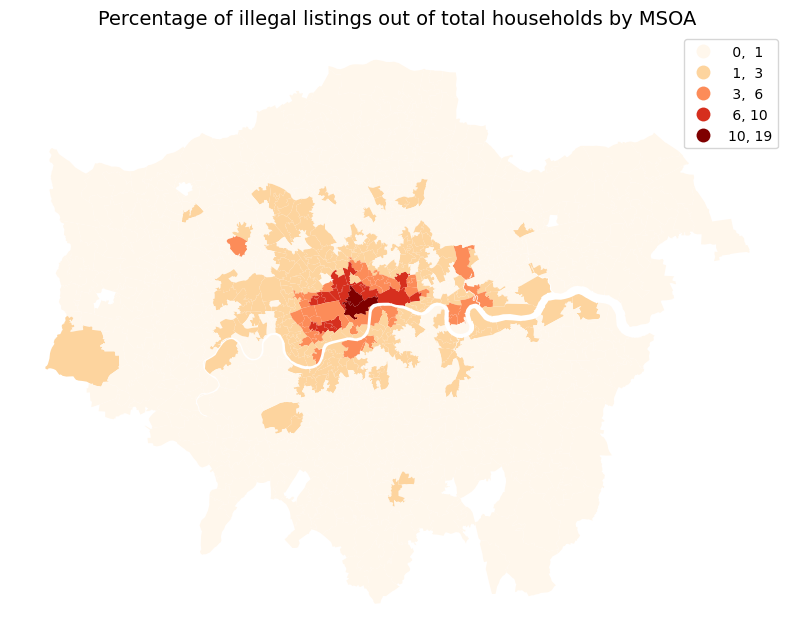

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

msoa_merged.plot(
    ax=ax,
    column="percentage",
    cmap="OrRd",
    scheme="NaturalBreaks",
    k=5,
    linewidth=0,
    legend=True,
    legend_kwds={
    "title": "",
    "fmt": "{:,.0f}"  # string, not method
}
)

# Make it look cleaner
ax.set_axis_off()
ax.set_title("Percentage of illegal listings out of total households by MSOA", fontsize=14)

plt.show()

**The growth of airbnb vs the growth of london's housing market**

According to the London Plan Annual Monitoring Report 2022–23 (Greater London Authority, 2025), annual housing completions in London have shown relatively limited variation in recent years. Between 2018 and 2023, net housing completions averaged approximately **36,600 homes** per year, with fluctuations of only a few thousand units across the period. This contrasts sharply with the rapid growth of Airbnb supply. In 2023, Airbnb added around 5000 new listings, and in 2024 this figure rose to more than 7,200, representing the equivalent of 13.8% to 20% of London’s yearly housing production. These proportions highlight that the rapid expansion of short-term rentals is effectively undermining the impact of London’s efforts to increase housing supply. Even as thousands of new homes are completed each year, a significant share appears to be absorbed into the Airbnb market rather than contributing to long-term housing availability.

**Nadia's comment** 

Here, it would be really interesting to take the housing annual supply of only inner london (which is 14k) and compare it to airbnbs only in inner london (I suppose that about 70/80% of all new listings are located in inner london) so the number will be more important, as you can see how airbnb is cutting the efforts of supplying new housing in the city center (were is more demand). Or we can take a borough from the city center as an example. the report is really good, ill put the link here if anyone want to check it https://www.london.gov.uk/programmes-strategies/planning/implementing-london-plan/monitoring-london-plan , just click on the London Plan Annual Monitoring Report 20 (September 2025) - PDF, 3.29 MB link) 


In [25]:
import pandas as pd

rent = rent.replace(["..", "-"], pd.NA)

numeric_cols = ["count_of_rents", "mean", "lower_quartile", "median", "upper_quartile"]

for col in numeric_cols:
    rent[col] = pd.to_numeric(rent[col], errors="coerce")

In [26]:
rent.head(7)

,borough,bedroom_category,count_of_rents,mean,lower_quartile,median,upper_quartile
0,Barking and Dagenham,Room,10.0,514.0,NaN,559.0,NaN
1,Barking and Dagenham,Studio,10.0,892.0,800.0,838.0,981.0
2,Barking and Dagenham,One Bedroom,180.0,1187.0,1050.0,1200.0,1300.0
3,Barking and Dagenham,Two Bedrooms,280.0,1416.0,1250.0,1415.0,1550.0
4,Barking and Dagenham,Three Bedrooms,180.0,1657.0,1500.0,1625.0,1850.0
5,Barking and Dagenham,Four or More Bedrooms,20.0,2112.0,1796.0,2200.0,2500.0
6,Barnet,Room,20.0,682.0,612.0,626.0,676.0


In [27]:
rent.dtypes

borough              object
bedroom_category     object
count_of_rents      float64
mean                float64
lower_quartile      float64
median              float64
upper_quartile      float64
dtype: object

In [28]:
# Calculate the percentage of illegal Airbnb listings relative to households per MSOA
rent["total_mean"] = (rent["count_of_rents"] * rent["mean"])

Smith (1979) first proposed the
rent gap model to offer a structural explanation for gentrification in American inner-city
contexts such as New York City and Philadelphia. At its core, the rent gap model describes a
situation where the actual economic returns to properties tend to decline or stagnate while
potential economic returns tend to increase. In neighborhoods where this “gap” between
actual and potential returns systematically increases, the result will be a correspondingly
increasing incentive for real estate capital to direct new housing investment flows. As these
investment flows drive up housing prices, attract more affluent newcomers, and displace
existing poorer residents, the result is gentrification.

In [29]:
bedroom_counts = listings_fulltime["bedrooms"].value_counts(dropna=False).sort_index()
print(bedroom_counts)

bedrooms
0        1439
1       14089
2       10341
3        3908
4        1601
5         496
6         178
7          46
8          12
9           6
11          3
12          1
15          2
18          1
22          2
24          1
50          1
<NA>       79
Name: count, dtype: Int64


In [30]:
def map_bedroom_category(n):
    if pd.isna(n):
        return "Unknown"
    n = int(n)
    if n <= 0:
        return "Studio"
    elif n == 1:
        return "One Bedroom"
    elif n == 2:
        return "Two Bedrooms"
    elif n == 3:
        return "Three Bedrooms"
    else:
        return "Four or More Bedrooms"

# Usamos el MISMO nombre que en el dataset de rentas para que luego el merge sea fácil
listings_fulltime["bedroom_category"] = listings_fulltime["bedrooms"].apply(map_bedroom_category)

# Chequear resultado
listings_fulltime["bedroom_category"].value_counts()

bedroom_category
One Bedroom              14089
Two Bedrooms             10341
Three Bedrooms            3908
Four or More Bedrooms     2350
Studio                    1439
Unknown                     79
Name: count, dtype: int64

In [31]:
listings_fulltime["estimated_revenue"] = listings_fulltime["price"] * listings_fulltime["availability_365"]

In [32]:
listings_sjoin_byborough.columns.tolist()

NameError: name 'listings_sjoin_byborough' is not defined

In [33]:
borough_2_merged.columns.tolist()

NameError: name 'borough_2_merged' is not defined

In [34]:
borough_2_merged.plot(figsize=(8, 8))
plt.title("London Boroughs – Preview")
plt.show()

NameError: name 'borough_2_merged' is not defined

In [35]:
borough_2_merged.columns.tolist()

NameError: name 'borough_2_merged' is not defined

Under London’s regulatory framework, a property may not be rented out for more than 90 nights a year as short-term rental without applying for a change of use, from residential to temporary acommodation. 

*** it would be good to have an approx stat here on the % of airbnbs that are operating with a temporary accomodation license - presumably almost no listings have this ***

We define short-term rental listings as those which allow a minimum length of stay shorter than 30 nights.
*** It would be great to find a stat here that says x % of airbnbs are used for short term rather than long term rentals to back up our assumptions ***

Although the Inside Airbnb dataset provides calendar data showing the availability of a listing for the next 365 days, it is impossible to assertain whether unavailable nights are as a result of nights being booked out by a guest or nights being 'blacked-out' by the owner. Thus, information on the number of days that listings are being rented out annually is sparse and unreliable. Instead, the following calculation was used to estimate the number of nights that each listing was occupied in the last 12 months:

*** we will make this into a nice equation on quarto***

occupancy in the last 12 months = (number of reviews in the last 12 months)/(percentage of guests that leave reviews)*(average minimum number of nights that guests are able to book for)

Assumptions
- number of reviews in the last 12 months is a proxy for demand (Quattrone SE economy paper & Fradkin 2015)
- 70% of guests leave reviews (Fradkin 2015)
- minimum number of nights is a number inputted by the owner on the app, and this can changed at any time and on a day-to-day basis (based on seasonality, preference,  etc) so might not reflect the situation for the previous 12 months
- Some of calculated last 12 month occupancy was > 365 (possibly because the current minimum number of nights is higher than the true minimum number of nights). We assume that it is plausible to assume 



In [36]:
# creating a df for illegal (>90 occupancy), short term (< 30 min days) rentals
# must decide what is the cutoff 
min_cutoff = 30
listings_illegal = listings[
    (listings["minimum_nights_avg_ntm"] < min_cutoff)
].copy()

print(f"There are {listings.shape[0]:,} listings in total.")
print(f"There are {listings_illegal.shape[0]:,} listings with a minimum stay of less than 30 days (short term rentals).")


# We now calculate the number of days that each listing was occupied in the last 12 months
# The 0.7 here comes from the assumption that 70% of Airbnb guests leave a review (Fradkin 2015)
listings_illegal["occupancy_ltm"] = (listings_illegal["number_of_reviews_ltm"]/0.7)*listings_illegal["minimum_nights_avg_ntm"]

# Convert the listings with occupancies > 365 to have the value 365
print(f"There are {listings_illegal[listings_illegal["occupancy_ltm"] > 365].shape[0]:,} listings with an occupancy greater than 365 days.")
listings_illegal["occupancy_ltm"] = listings_illegal["occupancy_ltm"].clip(upper=365)
print(f"There are now {listings_illegal[listings_illegal["occupancy_ltm"] > 365].shape[0]:,} listings with an occupancy greater than 365 days.")

# Calculate the revenue per listing for the last year
listings_illegal["revenue_ltm"] = listings_illegal["occupancy_ltm"]*listings_illegal["price"]

# Occupancy > 90 days
print(f"There are {listings_illegal[listings_illegal["occupancy_ltm"] > 90].shape[0]:,} short-term listings with an estimated occupancy of over 90 days in the last year.")
listings_illegal.drop(listings_illegal[listings_illegal["occupancy_ltm"] <= 90].index, inplace=True)

# Calculate total revenue per listing
listings_illegal["total_revenue_ltm"] = listings_illegal["occupancy_ltm"]*listings_illegal["price"]

# Calculate illegal revenue per listing (ie the revenue earned after 90 day limit was exceeded)
listings_illegal["illegal_revenue_ltm"] = (listings_illegal["occupancy_ltm"]-90)*listings_illegal["price"]

total_rev_sum = listings_illegal.loc[listings_illegal["occupancy_ltm"] > 90, 'revenue_ltm'].sum(skipna=True)
illegal_rev_sum = listings_illegal.loc[listings_illegal["occupancy_ltm"] > 90, 'illegal_revenue_ltm'].sum(skipna=True)
illegal_rev_sum_without_365 = listings_illegal.loc[
    (listings_illegal["occupancy_ltm"] > 90) &
    (listings_illegal["occupancy_ltm"] < 365),
    'illegal_revenue_ltm'
].sum(skipna=True)

print(f"The approximate total revenue earned from listings which offer short-term rentals is £{total_rev_sum:,.0f}.")
print(f"The approximate total revenue earned from illegal, short-term rentals is £{illegal_rev_sum:,.0f}.")

There are 86,483 listings in total.
There are 83,205 listings with a minimum stay of less than 30 days (short term rentals).
There are 194 listings with an occupancy greater than 365 days.
There are now 0 listings with an occupancy greater than 365 days.
There are 5,659 short-term listings with an estimated occupancy of over 90 days in the last year.
The approximate total revenue earned from listings which offer short-term rentals is £158,869,147.
The approximate total revenue earned from illegal, short-term rentals is £68,392,417.


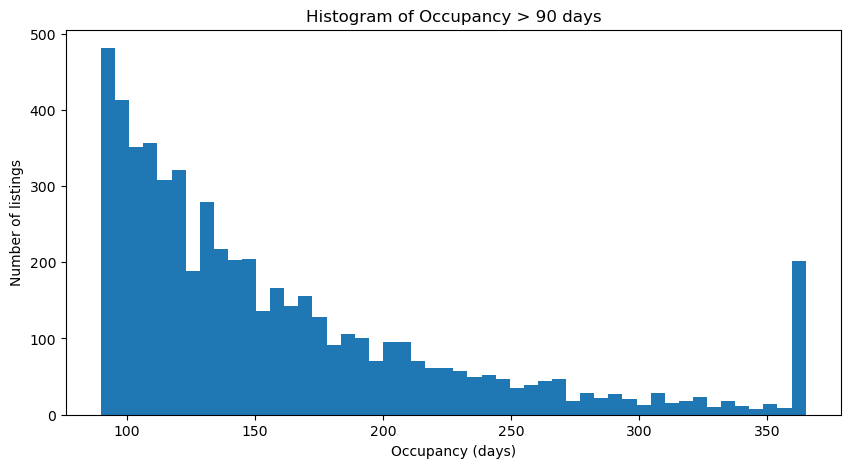

In [37]:
import matplotlib.pyplot as plt

listings_illegal["occupancy_ltm"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.hist(listings_illegal.loc[listings_illegal["occupancy_ltm"] > 90, "occupancy_ltm"], bins=50)
plt.xlabel("Occupancy (days)")
plt.ylabel("Number of listings")
plt.title("Histogram of Occupancy > 90 days")
plt.show()

In [38]:
illegal_rev_for_entire = listings_illegal.loc[
    (listings_illegal["occupancy_ltm"] > 90) & 
    (listings_illegal["room_type"] == 'Entire home/apt'),
    'illegal_revenue_ltm'
].sum(skipna=True)

print(f"Of the £{illegal_rev_sum:,.0f} earned through illegal rental activities, {illegal_rev_for_entire/illegal_rev_sum*100:,.0f}% of this was for entire home/apartment rentals.")

Of the £68,392,417 earned through illegal rental activities, 88% of this was for entire home/apartment rentals.


In [39]:
illegal_rev_for_mult_hosts = listings_illegal.loc[
    (listings_illegal["occupancy_ltm"] > 90) & 
    (listings_illegal["calculated_host_listings_count"] > 1),
    'illegal_revenue_ltm'
].sum(skipna=True)

print(f"Of the £{illegal_rev_sum:,.0f} earned through illegal rental activities, {illegal_rev_for_mult_hosts/illegal_rev_sum*100:,.0f}% of this was from hosts which own multiple listings.")

Of the £68,392,417 earned through illegal rental activities, 83% of this was from hosts which own multiple listings.


In [41]:
#Convert listings fulltime df into Geopandas
import geopandas as gpd

listings_illegal = gpd.GeoDataFrame(
    listings_illegal,
    geometry=gpd.points_from_xy(
        listings_illegal.longitude,
        listings_illegal.latitude
    ),
    crs="EPSG:4326"    
)

In [42]:
#Reproject to Britain National Grid
listings_illegal = listings_illegal.to_crs(epsg=27700)

#listings_illegal.info()

In [43]:
# Spatial join of the listing according to Msoa and create a group count value for each msoa
listings_sjoin = gpd.sjoin(
    listings_illegal,
    msoa_merged,
    how="left",
    predicate="within"
)

illegal_stats_msoa = (
    listings_sjoin
    .groupby("msoa_name")
    .agg(
        listing_count=("illegal_revenue_ltm", "size"),
        illegal_revenue_sum=("illegal_revenue_ltm", "sum")
    )
)

In [ ]:
#illegal_stats_msoa.head()

In [ ]:
#print(msoa_merged.columns)
#print(illegal_stats_msoa.columns)

In [44]:
#  Merge the listing_count values (by MSOA) into the MSOA GeoDataFrame
illegal_stats_msoa = illegal_stats_msoa.reset_index()

msoa_merged = msoa_merged.merge(
    illegal_stats_msoa,
    on="msoa_name",
    how="left"
)

In [ ]:
#msoa_merged[~msoa_merged.geometry.is_valid]

<Axes: >

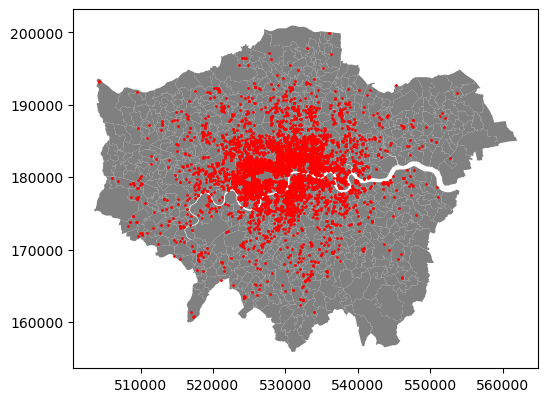

In [47]:
#THIS IS A PLOT OF ALL ILLEGAL LISTINGS
ax = msoa_merged.plot(figsize=(6,6),color="grey")
listings_illegal.plot(ax=ax, color="red", markersize=1)

In [48]:
# Calculate the percentage of illegal Airbnb listings relative to households per MSOA
msoa_merged["percent_illegal"] = (msoa_merged["listing_count"] / msoa_merged["households_2011all_households"]*100)
#msoa_merged.head()

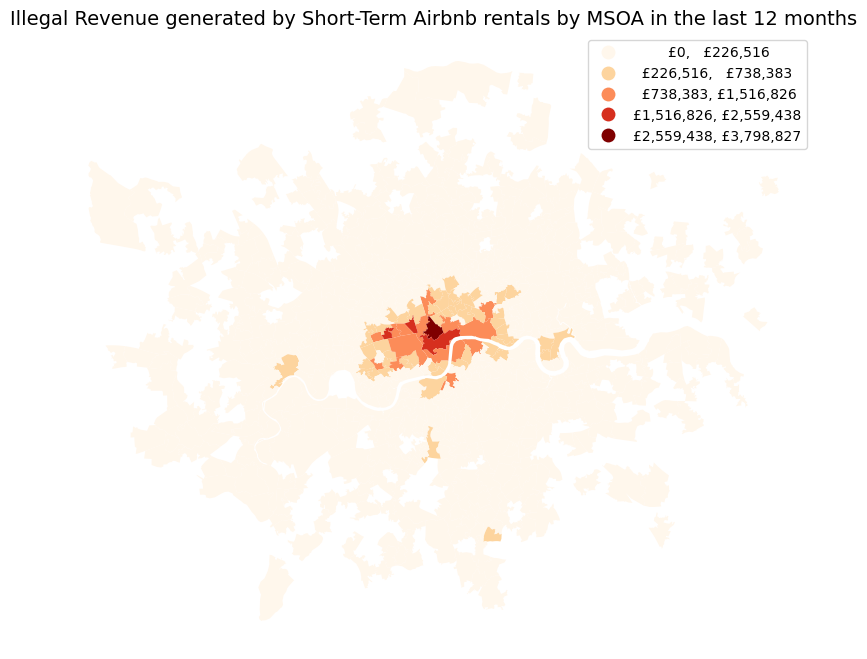

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

msoa_merged.plot(
    ax=ax,
    column="illegal_revenue_sum",
    cmap="OrRd",
    scheme="NaturalBreaks",
    k=5,
    linewidth=0,
    legend=True,
    legend_kwds={
    "title": "",
    "fmt": "£{:,.0f}"  # string, not method
}
)

# Make it look cleaner
ax.set_axis_off()
ax.set_title("Illegal Revenue generated by Short-Term Airbnb rentals by MSOA in the last 12 months", fontsize=14)

plt.show()

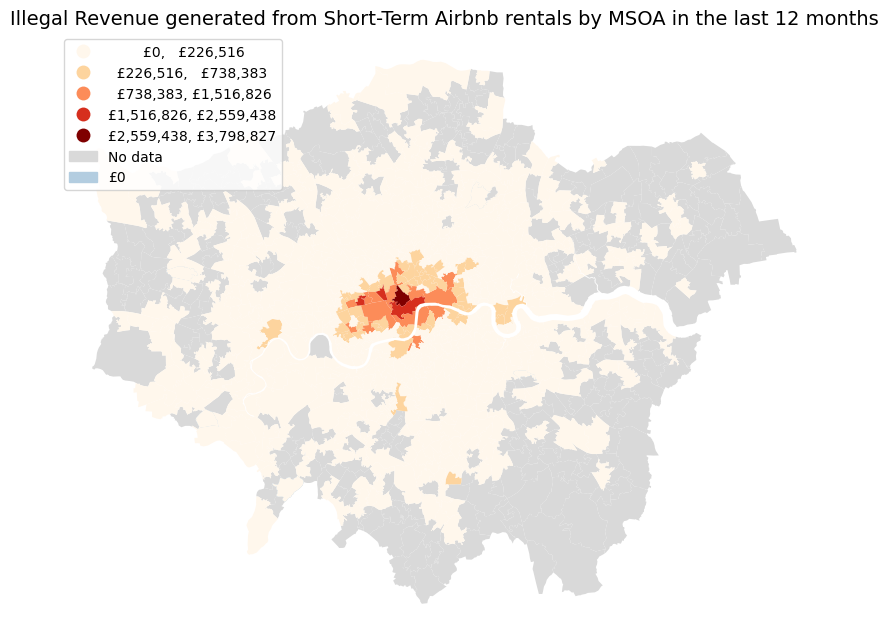

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# --- 1. Create masks ---
nan_mask = msoa_merged["illegal_revenue_sum"].isna()
zero_mask = msoa_merged["illegal_revenue_sum"].eq(0)
data_mask = ~(nan_mask | zero_mask)    # all positive values

# --- 2. Plot NaN values (grey) ---
msoa_merged[nan_mask].plot(
    ax=ax,
    color="#d9d9d9",   # light grey
    linewidth=0
)

# --- 3. Plot zero values (light blue or other color) ---
msoa_merged[zero_mask].plot(
    ax=ax,
    color="#b3cde0",   # choose a color for zero
    linewidth=0
)

# --- 4. Plot positive values with Natural Breaks classification ---
msoa_merged.plot(
    ax=ax,
    column="illegal_revenue_sum",
    cmap="OrRd",
    scheme="NaturalBreaks",
    k=5,
    linewidth=0,
    legend=True,
    legend_kwds={
    "title": "",
    "fmt": "£{:,.0f}"  # string, not method
}
)

# --- 5. Custom legend patches ---
no_data_patch = mpatches.Patch(color="#d9d9d9", label="No data")
zero_patch    = mpatches.Patch(color="#b3cde0", label="£0")

# --- 6. Retrieve the existing choropleth legend (created by geopandas) ---
orig_legend = ax.get_legend()

# If the original legend exists, get its handles + labels
if orig_legend:
    orig_handles = orig_legend.legend_handles
    orig_labels = [t.get_text() for t in orig_legend.get_texts()]
else:
    orig_handles, orig_labels = [], []

# --- 7. Combine original legend + your custom patches ---
combined_handles = orig_handles + [no_data_patch, zero_patch]
combined_labels  = orig_labels  + ["No data", "£0"]

# Remove the original legend so we can replace it
if orig_legend:
    orig_legend.remove()

# --- 8. Add combined legend back ---
ax.legend(
    handles=combined_handles,
    labels=combined_labels,
    loc="upper left",
    frameon=True
)
# --- 9. Add title ---
ax.set_axis_off()
ax.set_title("Illegal Revenue generated from Short-Term Airbnb rentals by MSOA in the last 12 months", fontsize=14)

plt.show()

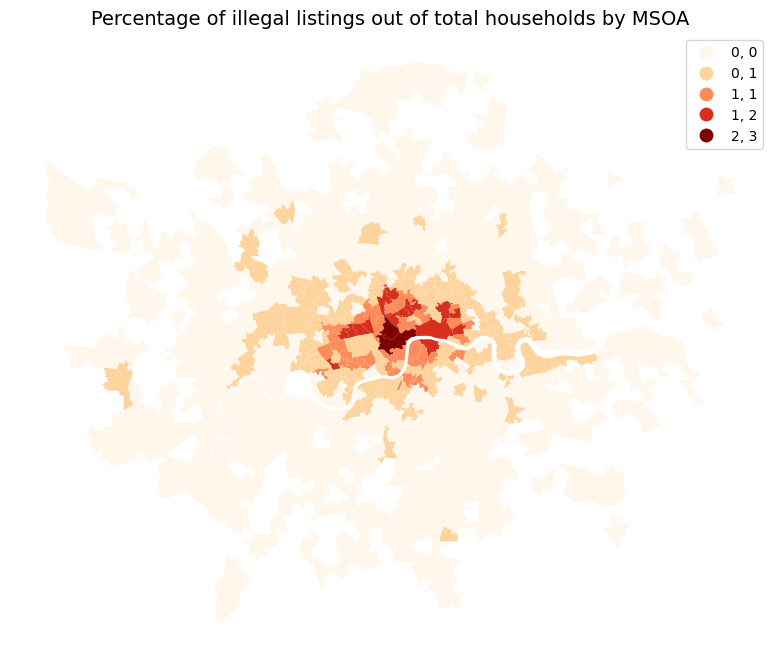

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

msoa_merged.plot(
    ax=ax,
    column="percent_illegal",
    cmap="OrRd",
    scheme="NaturalBreaks",
    k=5,
    linewidth=0,
    legend=True,
    legend_kwds={
    "title": "",
    "fmt": "{:,.0f}"  # string, not method
}
)

# Make it look cleaner
ax.set_axis_off()
ax.set_title("Percentage of illegal listings out of total households by MSOA", fontsize=14)

plt.show()

**Conclusions from the map**
The map reveals a highly asymmetric spatial distribution of illegal Airbnb Activity in London. In contrast, most MSOAs in Outer London, show minimun levels of illegal Airbnb Activity. This suggests that Airbnb is not "out of control" everywhere, but is concentrated in central, high demand areas.
**(This parragraph needs more work)**

---

#### **Question 3: How many properties would be affected by the opposition’s proposal?**

This question looks at **professional full-time entire-home Airbnb listings only**, attaches each listing to its borough’s and accordingly the average council tax, in order evaluate several listings affected by the oppsional propusal of increasing the council tax, we are applting a **40% council tax increase** as a stndard value of growth (140%) to estimate how many properties see a drop in profit.

**The workflow:** clean and merge council tax with borough polygons, filterise the listings, spatially join listings to boroughs, compare average annual revenue vs average council tax by borough, then simulate a 40% tax rise and calculate profit loss per listing before aggregating to borough level.

**Datasets used:** MAYBE MOVE THIS

>**1. Professional landlord listings (from Q2)**
    - Issues:
        - Not all listings have an estimated annual revenue, so they are removed from the calculation.
        - Not all listings are profitable from the beginning, so once subtracting council tax,
      they aren't profitable. And removed from analysis because they have negative values. 

>**2. Borough boundaries (spatial file)**
    - Issues:
        - The boundaries should be deselected and have an output for the actual borough boundary to merge with council tax.

>**3. Borough-level council tax**
    - Issues:
        - The file has been selected by the year 2024-2025 and only filtered to Band D, which the GLA references as a starting point to evaluate the overall borough tax.
        - The value that we extract is associated with the annual tax *(column Band D, which we later rename as council tax).*

In [ ]:
# -- The Work Mythology For evaluating How many properties would be affected by the opposition’s proposal:--
# Steps Overview:
# 1. Cleaning and aligning the Council Tax CSV to prepare for a merge. 
# 2. Clean the Borough Shapefile and prepare for the merge.#############
# 3. Merge Council Tax Into Borough Shapefile.
# 4. Cleaning and Filtering Listings according to mythology to locate a Professional Landlord, per Q2.
# 5. Spatial Join Listings to Borough Tax Data.
# 6. Calculate Borough Averages: of Airbnb annual Revenue vs Council Tax.
# 7. Evaluate Average Airbnb Revenue vs Average Council Tax per Borough. 
#    Output: Figure 01
# 8. Create a Scenario that increases Council Tax by 40% for Professional Hosts, with the increase varying by borough.
# 9. The borough's share of listings is losing >40% of its profit.
# 10. Linear Relationship Between Revenue and Profit Loss.
#    Output:  **Figure 02** 
# 11. Spatial Point Map of the listings that have had more than 40% loss of profit.
#    Output: **Figure 03**
# 12. Map of Average Profit Loss per Borough.
#    Output: **Figure 04**

In [ ]:
# Step 01 - Cleaning and Aligning Council Tax CSV to preapre for merge ^^^^ MOVE UP

# Rename columns in council tax for easy reading
council_tax2 = council_tax.rename(columns={
    'local_authority': 'borough_name_raw',
    'band_d': 'council_tax',
    'code': 'borough_code'})

# Make sure the borough code is a string
council_tax2['borough_code'] = (
    council_tax2['borough_code']
    .astype(str)
    .str.strip())

# make sure council_tax is numeric, (what was yearly band D)
council_tax2['council_tax'] = pd.to_numeric(council_tax2['council_tax'], errors='coerce')

# drop rows where council_tax is missing value 
council_tax2 = council_tax2.dropna(subset=['council_tax'])

# Print Output of row columns and top 5 head of the rows
print("clean council tax:", council_tax2.shape)
display(council_tax2.head())

# ---- Output Data -----
# council_tax2 = Which is a cleaned and renamed version of council_tax

In [ ]:
# Step 3 - Merge Council Tax Into Borough Shapefile

# Merge the shape file borough_shp with council_tax2 through a left join with the borough code value as a shared id
borough_tax = borough_shp.merge(
    council_tax2[['borough_code', 'council_tax']],
    on='borough_code',
    how='left'
)

print("borough_tax merged:", borough_tax.shape)
print("missing council tax:", borough_tax['council_tax'].isna().sum()) # make sure that all boundries have been attributed council tax
display(borough_tax.head())

# ---- Output Data -----
# borough_tax = Merged spatial file with council tax data

In [ ]:
# Step 04 - Clean & Filter Listings for Full-Time Entire Homes

# Ensure numeric columns just because the data has been used beforehand ######
num_cols = [
    'availability_365',
    'estimated_occupancy_l365d',
    'estimated_revenue_l365d',
    'host_total_listings_count',
    'latitude',
    'longitude'
]

for col in num_cols:
    listings[col] = pd.to_numeric(listings[col], errors='coerce')

# Normalise room_type #######3
listings['room_type'] = listings['room_type'].str.lower().str.strip()

# Professional host flag ####
listings['is_professional_host'] = listings['host_total_listings_count'] > 1


#### Maybe starts From Here

# Keep only columns needed for Q3
cols_needed = [
    'id',
    'host_id',
    'latitude',
    'longitude',
    'price',
    'availability_365',
    'estimated_occupancy_l365d',
    'estimated_revenue_l365d',
    'host_total_listings_count',
    'room_type',
    'is_professional_host'
]
# Create a Copy named listings_q3
listings_q3 = listings[cols_needed].copy()

# Make sure rows with missing IDs are dropped (Extra Safety)
before_id_drop = len(listings_q3) # text output
listings_q3 = listings_q3.dropna(subset=['id', 'host_id'])
after_id_drop = len(listings_q3) # text output
removed_id_rows = before_id_drop - after_id_drop # How many listings with na values have we droped? Hopefully 0
print(f"Removed {removed_id_rows} rows with missing id/host_id")

# Drop rows with missing coordinates (can't map/join them)
before_coord_drop = len(listings_q3) # text output
listings_q3 = listings_q3.dropna(subset=['latitude', 'longitude'])
after_coord_drop = len(listings_q3) # text output
removed_coord_rows = before_coord_drop - after_coord_drop # How many listings with na values have we droped? Hopefully 0
print(f"Removed {removed_coord_rows} rows with missing coordinates")

# Filter to entire homes only according to mythology in Q2 ##############
listings_entire = listings_q3[
    listings_q3['room_type'] == "entire home/apt"
].copy()

# Filter to full-time (90+ days available) according to mythology in Q2 ###########
listings_fulltime = listings_entire[
    listings_entire['availability_365'] > 90 
].copy()

# Explicit annual revenue column from Airbnb data #########^^^^^
# The Column is calculated by Airbnb (the price per night multiplied by the estimated occupancy out of 365 days).
# We treat the estimated 365-day revenue as annual revenue 
listings_fulltime['annual_revenue'] = listings_fulltime['estimated_revenue_l365d']

print("full-time entire homes:", listings_fulltime.shape)
display(listings_fulltime.head())

# ---- Output Data -----
# listings_q3 = contains Airbnb listing data cleaned and filtered by columns only for Q3
# listings_entire = Subset 1 of listings_q3 filtered by entire home and apartment
# listings_fulltime = Subset 2 from listings_entire filtered by availability for more than 90 days

In [ ]:
# Step 05 - Spatial Join Listings to Borough Tax Data (clean)

# Make sure borough_tax CRS is correct according to World Geodetic System 1984
borough_tax = borough_tax.to_crs(epsg=4326) # what we did before was for borough, not borough_tax

# Filter listings_fulltime to the London bounding box
# First, calculate the bounding box by maximum and minimum values of the borough boundaries
minx, miny, maxx, maxy = borough_tax.total_bounds

in_london_bbox = (
    (listings_fulltime['longitude'] >= minx) &
    (listings_fulltime['longitude'] <= maxx) &
    (listings_fulltime['latitude']  >= miny) &
    (listings_fulltime['latitude']  <= maxy)
)

print("full-time listings total:", len(listings_fulltime))
print("full-time listings inside London bbox:", in_london_bbox.sum())

# make sure all listings point are within the bounding box
listings_fulltime_london = listings_fulltime[in_london_bbox].copy()

# Create GeoDataFrame from these listings within the London bounding box
listings_gdf = gpd.GeoDataFrame(
    listings_fulltime_london.copy(),
    geometry=gpd.points_from_xy(
        listings_fulltime_london.longitude,
        listings_fulltime_london.latitude
    ),
    crs="EPSG:4326"
)

# Spatial join using within 
# taking the borough geometry and evaluating which points are within which boroughs, 
# and assigning to each point its borough value and accordingly its annual council tax.
listings_gdf = gpd.sjoin(
    listings_gdf,
    borough_tax[['borough_code', 'borough_name', 'council_tax', 'geometry']],
    how='left',
    predicate='within'
)

print("after spatial join:", listings_gdf.shape)
print("listings missing council tax after join:",
      listings_gdf['council_tax'].isna().sum())

# drop unmatched listings
# points that werent matched with a borough would be lost
rows_before = listings_gdf.shape[0] 
listings_gdf = listings_gdf.dropna(subset=['council_tax']).copy()
rows_after = listings_gdf.shape[0]
print("dropped unmatched listings:", rows_before - rows_after)
print("after dropping unmatched listings:", listings_gdf.shape)

display(listings_gdf.head())

# Quick visual check ################### Dont PRINT
# ax = borough_tax.plot(edgecolor='black', facecolor='none', figsize=(6, 6))
listings_gdf.sample(1000, random_state=1).plot(ax=ax, markersize=1)

# ---- Output Data -----
# listings_fulltime_london = only points located inside the London Bounding Box
# listing_gdf = geo-dataframe containing listing points and their attributes, boroughs, and council tax.

In [ ]:
# Step 06 -  Borough Averages: Revenue vs Council Tax

# Create a Copy of the file just for this Summary (Safety Reasons)
listings_for_summary = listings_gdf.copy()

# Group the listings by Borough, calculate new values for the number of listings per borough, Average annual revenue, and average council tax per borough. 
borough_summary = (
    listings_for_summary
    .groupby(['borough_code', 'borough_name'], as_index=False)
    .agg(
        avg_airbnb_revenue=('annual_revenue', 'mean'),  # average revenue
        avg_council_tax=('council_tax', 'mean'),        # average council tax
        n_listings=('id', 'count')                      # number of listings
    )
    .sort_values('avg_airbnb_revenue', ascending=False) # affects the plot
)

print("borough_summary shape:", borough_summary.shape)
display(borough_summary.head())


# ---- Output Data -----
# borough_summary = is a summarized table of revenue,tax, and listing per borough.

#### **Figure 01** | Average Airbnb Revenue vs Average Council Tax per Borough 

In [ ]:
# Step 07 - Figure 01
# A combined line and point graph comparing:
#   (1) Average annual Airbnb revenue per borough
#   (2) Average council tax per borough (Band D)
#   (3) Number of professional full-time listings per borough (as labels above points)
# The x-axis is ordered by borough_summary (currently sorted by number of listings).

# Prep the x-axis labels and positions
# Convert borough names to Title Case for neat axis labels.
x_labels = borough_summary['borough_name'].str.title().tolist()

# Create a numeric position for each borough on the x-axis.
x_pos = np.arange(len(x_labels))

# Extract the series we want to plot from the summary table:
rev_vals = borough_summary['avg_airbnb_revenue'].values   # average annual revenue per borough
tax_vals = borough_summary['avg_council_tax'].values      # average council tax per borough
n_vals   = borough_summary['n_listings'].values           # number of listings per borough

# Create the base figure and first axis (for revenue)
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Line 1: Average Airbnb revenue per borough (left y-axis)
rev_line = ax1.plot(
    x_pos,
    rev_vals,
    marker='o',
    color='tab:purple',
    label='Avg annual Airbnb revenue'
)[0]

# Label the left y-axis for revenue and set the borough names on the x-axis.
ax1.set_ylabel('Average annual revenue (£)')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x_labels, rotation=90)

# Create the second axis (for council tax) sharing the same x-axis
ax2 = ax1.twinx()

# Plot Line 2: Average council tax per borough (right y-axis)
tax_line = ax2.plot(
    x_pos,
    tax_vals,
    marker='s',
    linestyle='--',
    color='tab:orange',
    label='Avg council tax (Band D)'
)[0]

# Label the right y-axis for council tax.
ax2.set_ylabel('Average council tax (£)')

# Add the number of listings as text labels above the revenue points
# Calculate a small vertical offset so the labels sit just above the revenue markers.
offset = (rev_vals.max() - rev_vals.min()) * 0.04  # 4% off the revenue range

for x, y, n in zip(x_pos, rev_vals, n_vals):
    ax1.text(
        x,
        y + offset,
        str(n),            # show the count of listings
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

# Combined legend for both lines
ax1.legend(
    [rev_line, tax_line],
    ['Avg annual Airbnb revenue', 'Avg council tax (Band D)'],
    loc='upper right'
)

# Final layout and title 
plt.title(
    'Average Airbnb Revenue vs Average Council Tax per Borough\n'
    '(Professional full-time listings)'
)

plt.tight_layout()
plt.show()

# ---- Output Figure ----
# Figure 01: Dual-axis line graph showing how average Airbnb revenue and average council tax
#            vary by borough, with listing counts labelled above each revenue point.

In [ ]:
# Step 07b - Text Summary for Figure 01
# A short diagnostic summary of:
#   (1) Average annual revenue per borough
#   (2) Average council tax per borough
#   (3) Top / bottom revenue boroughs
#   (4) Correlation between revenue and council tax

# Ensure we use the same ordering as Figure 01 (highest → lowest revenue)
borough_summary_rev = (
    borough_summary
    .sort_values('avg_airbnb_revenue', ascending=False)
    .reset_index(drop=True)
)

# 1. Overall averages across all boroughs
overall_rev_mean = borough_summary_rev['avg_airbnb_revenue'].mean()
overall_tax_mean = borough_summary_rev['avg_council_tax'].mean()

# 2. Top 3 and bottom 3 boroughs by average annual revenue
top3 = borough_summary_rev.head(3)
bottom3 = borough_summary_rev.tail(3)

# 3. Simple Pearson correlation between revenue and council tax
#    (Measures whether high-tax boroughs also tend to have high average revenue.)
corr_rev_tax = borough_summary_rev['avg_airbnb_revenue'].corr(
    borough_summary_rev['avg_council_tax']
)

print("!! Summary for Figure 01: Revenue vs Council Tax by Borough !!\n")

# Overall averages
print(f"Overall average annual revenue per listing: £{overall_rev_mean:,.0f}")
print(f"Overall average council tax (Band D):      £{overall_tax_mean:,.0f}\n")

# Top 3 revenue boroughs
print("Top 3 boroughs by average annual Airbnb revenue:")
for _, row in top3.iterrows():
    print(
        f"  - {row['borough_name'].title()}: "
        f"£{row['avg_airbnb_revenue']:,.0f} avg revenue, "
        f"£{row['avg_council_tax']:,.0f} avg council tax, "
        f"{int(row['n_listings'])} listings"
    )

# Bottom 3 revenue boroughs
print("\nBottom 3 boroughs by average annual Airbnb revenue:")
for _, row in bottom3.iterrows():
    print(
        f"  - {row['borough_name'].title()}: "
        f"£{row['avg_airbnb_revenue']:,.0f} avg revenue, "
        f"£{row['avg_council_tax']:,.0f} avg council tax, "
        f"{int(row['n_listings'])} listings"
    )

# Correlation between revenue and tax
print("\nCorrelation between average revenue and average council tax:")
print(
    f"  Pearson r ≈ {corr_rev_tax:.2f}  "
    "(+1 = strong positive, 0 = no linear relationship, -1 = strong negative)"
)

**Summary Figure 01** 
> this shows that average annual revenue (aprox. £9.3k) is much higher than average council tax (aprox. £1.9k). That high-revenue central boroughs (Westminster, Kensington & Chelsea, Camden) tend to have **lower** average council tax. In contrast, low-revenue outer boroughs often face higher taxes and have far fewer listings.

In [ ]:
# Step 08 - Council Tax Increase Scenario for Professional Hosts
# In this step we:
#   1) Compute current net profit (revenue - council tax).
#   2) Apply a +40% council tax scenario.
#   3) Measure how much profit each listing loses in % terms.
#   4) Flag listings that lose more than a chosen threshold (e.g. 40%).

# Filter only professional full-time entire homes.
# (All subsequent calculations are done only on this group.)
listings_prof = listings_gdf[listings_gdf['is_professional_host']].copy()
print("Number of professional full-time listings:", listings_prof.shape)

# Make sure the key numeric columns are actually numeric.
# This protects us from strings, blanks, etc.
listings_prof['annual_revenue'] = pd.to_numeric(
    listings_prof['annual_revenue'], errors='coerce'
)
listings_prof['council_tax'] = pd.to_numeric(
    listings_prof['council_tax'], errors='coerce'
)

# Drop rows that are missing revenue or council tax and print outcome
before_na = len(listings_prof)
listings_prof = listings_prof.dropna(subset=['annual_revenue', 'council_tax']).copy()
print("  - Dropped due to missing annual_revenue/council_tax:",
      before_na - len(listings_prof),
      "| remaining:", len(listings_prof))

# ------------------------------------------------------------
# 8.2 Current vs increased council tax
# ------------------------------------------------------------

# Current net profit for each listing:
# net_profit_current = annual_revenue - current council tax.
listings_prof['net_profit_current'] = (
    listings_prof['annual_revenue'] - listings_prof['council_tax'])

# Drop listings that are already not profitable BEFORE the tax rise.
# These are not really 'damaged' by the new policy because they were
# not making money to begin with.
before_profit = len(listings_prof)
listings_prof = listings_prof[listings_prof['net_profit_current'] > 0].copy()
print("  - Dropped due to non-positive profit:",
      before_profit - len(listings_prof),
      "| remaining:", len(listings_prof))

# Apply the policy: increase council tax by 40%. ###################333
# (Change tax_increase_factor if you want to test another scenario.)
tax_increase_factor = 1.40   # 1.40 = +40%
listings_prof['council_tax_new'] = listings_prof['council_tax'] * tax_increase_factor

# Net profit AFTER the tax increase:
listings_prof['net_profit_new'] = (
    listings_prof['annual_revenue'] - listings_prof['council_tax_new'])

# Absolute loss in profit in £:
listings_prof['profit_loss_abs'] = (
    listings_prof['net_profit_current'] - listings_prof['net_profit_new'])

# Percentage loss in profit relative to original profit:
listings_prof['profit_loss_pct'] = (
    listings_prof['profit_loss_abs'] / listings_prof['net_profit_current'])

# Total number of listings in our profit model (after all filters above)
n_total_prof = len(listings_prof)

# ------------------------------------------------------------
# 8.3 Threshold-based loss flag (easily changeable)
# ------------------------------------------------------------

# Choose the policy threshold: ##################
# loss_threshold = 0.40  > loses more than 40% of its original profit.
loss_threshold = 0.40

# Flag listings that lose more than this % of their original profit.
listings_prof['loss_over_threshold'] = (
    listings_prof['profit_loss_pct'] > loss_threshold
)

# Count how many professional listings are heavily affected.
n_affected = listings_prof['loss_over_threshold'].sum()

# Share of professional listings that lose more than the threshold.
pct_affected = (n_affected / n_total_prof * 100) if n_total_prof > 0 else np.nan

print(
    f"Listings losing more than {loss_threshold:.0%} of profit: "
    f"{n_affected} out of {n_total_prof} "
    f"({pct_affected:.1f}% of professional full-time listings)"
)

# Easy subset for mapping/plotting later on:
# listings_prof_affected contains only the 'heavily hit' listings.
listings_prof_affected = listings_prof[listings_prof['loss_over_threshold']].copy()

# Quick peek at the first few records used in the profit model.
display(
    listings_prof[
        ['borough_name', 'annual_revenue', 'council_tax', 'council_tax_new',
         'net_profit_current', 'net_profit_new',
         'profit_loss_pct', 'loss_over_threshold']
    ].head()
)

# ---- Output DataFrames ----
# listings_prof:
#   Professional full-time entire-home listings that:
#     - have valid annual_revenue and council_tax
#     - were profitable BEFORE the tax rise (net_profit_current > 0)
#   For each of these listings, we now have:
#     * net_profit_current      – profit before the 40% tax increase
#     * council_tax_new         – council tax after the 40% increase
#     * net_profit_new          – profit after the tax increase
#     * profit_loss_abs         – £ profit lost due to the tax increase
#     * profit_loss_pct         – % of original profit that was lost
#     * loss_over_threshold     – True/False flag: loses > 40% of profit

# listings_prof_affected:
#   Subset of listings_prof where loss_over_threshold == True.
#   These are the “heavily hit” professional listings that lose
#   more than 40% of their original profit under the new council tax.

In [ ]:
# Step 09 - Borough share of listings losing >40% of profit
# Goal:
#   1) For each borough, count how many professional full-time listings
#      lose more than 40% of their original profit.
#   2) Express this as a percentage of all professional listings
#      in that borough.
#   3) This shows where hosts are *most likely* to be heavily hit
#      by the 40% council tax increase.

# Create a boolean flag for "heavily affected" listings
listings_prof['over_thresh'] = listings_prof['profit_loss_pct'] > loss_threshold

# Borough-level summary of exposure to the policy
borough_impact = (
    listings_prof
    .groupby('borough_name', as_index=False)
    .agg(
        total_listings=('id', 'count'),      # all professional full-time listings
        affected=('over_thresh', 'sum')          # how many lose >40% profit
    )
)

# Convert to percentage of listings in each borough
borough_impact['affected_share_pct'] = (
    borough_impact['affected'] / borough_impact['total_listings'] * 100
).round(1)

# Sort from most exposed borough to least
borough_impact = (
    borough_impact
    .sort_values('affected_share_pct', ascending=False)
    .reset_index(drop=True)
)

display(borough_impact)

# ---- Output table ----
# borough_impact = for each borough:
#   - total_listings: number of professional full-time listings
#   - affected: number of those losing >40% of profit
#   - affected_share_pct: % of listings in that borough that are heavily hit

#### **Figure 02** | Linear Relationship Between Revenue and Profit Loss

In [ ]:
# Step 10 - Figure 03: Linear Relationship Between Revenue and Profit Loss
# In this step we:
#   1) Trim away extreme revenue outliers (top 1%) so the plot is readable.
#   2) Look only at listings with a sensible profit-loss value (0–100%).
#   3) Scatter-plot annual revenue vs % profit lost.
#   4) Fit a simple straight line (least-squares) just to see if there is
#      any clear linear pattern between revenue level and damage from the tax.

# Trim extremes so a few huge listings don't dominate the axes
rev_q99 = listings_prof['annual_revenue'].quantile(0.99)

# Keep only:
#   - Revenue below or equal to the 99th percentile
#   - Profit loss between 0 and 1 (0–100%)
mask = (
    (listings_prof['annual_revenue'] <= rev_q99) &
    (listings_prof['profit_loss_pct'] >= 0) &
    (listings_prof['profit_loss_pct'] <= 1)   # 0–100% loss
)

# Extract the x (revenue) and y (loss proportion) for the filtered sample
x = listings_prof.loc[mask, 'annual_revenue'].values
y = listings_prof.loc[mask, 'profit_loss_pct'].values

print(f"Using {mask.sum()} listings out of {len(listings_prof)} for the regression plot.")

# Safety check: only fit a line if we actually have data left
if len(x) > 1:
    # Fit a simple linear regression: y ≈ a + b * x
    # (Minimal, hand-rolled regression to get a line.)
    a, b = np.polyfit(x, y, 1)

    # Plot the scatter and the fitted line
    fig, ax = plt.subplots(figsize=(7, 4))

    # Each point = one professional listing (after trimming)
    ax.scatter(x, y, s=1, alpha=0.3)

    # Generate a smooth line over the observed revenue range
    x_line = np.linspace(x.min(), x.max(), 100)
    ax.plot(x_line, a + b * x_line, linewidth=2)

    ax.set_xlabel('Annual revenue (£)')
    ax.set_ylabel('Profit loss proportion')
    ax.set_title(
        'Profit Loss vs Annual Revenue\n'
        '(99th percentile trimmed, simple fitted line)'
    )

    # Keep y-axis in a sane range; cap around the max observed loss
    ax.set_ylim(0, max(y.max() * 1.1, 0.5))

    plt.tight_layout()
    plt.show()

    # Print the approximate regression equation for interpretation in the text
    print(f"Approx regression: profit_loss_pct ≈ {a:.4f} + {b:.8f} * annual_revenue")
else:
    print("Not enough data after filtering to fit a regression line.")

**Summary Figure 02** 
>(revenue vs % profit loss) shows a non-linear pattern: low-revenue listings can lose up to 100% of their profit, while high-revenue listings are mostly unaffected. Consequently, the tax mainly bites at the bottom rather than the top.

#### **Figure 03** | Spatial Point Map of the listings that have had more than 40% loss of profit

In [ ]:
# Step 11 - Figure 03
# Spatial map of the *heavily affected* listings

# In this figure we show:
#   - Only professional full-time listings that lose >40% of their
#     original profit under the +40% council tax scenario
#     (loss_over_threshold == True -> listings_prof_affected).
#   - Borough polygons are drawn in the background.
#   - Purple dots show where highly impacted listings are clustered.

fig, ax = plt.subplots(figsize=(6, 6))

# Plot the borough boundaries as a neutral backdrop.
borough_tax.plot(
    ax=ax,
    edgecolor='grey',
    facecolor='none'
)

# Overlay only the "heavily hit" listings (>40% profit loss).
listings_prof_affected.plot(
    ax=ax,
    edgecolor='none',
    facecolor='purple',
    markersize=3
)

# Titles & axes labels.
ax.set_title(
    'Listings with >40% Loss of Profit\n'
    '(Professional full-time, +40% council tax)'
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

# ---- Output Figure ----
# Figure 02: Point map of professional full-time listings that lose
#            more than 40% of their original profit, plotted against
#            the London borough boundaries.

In [ ]:
# Step 11b - Text summary for borough exposure to >40% profit loss
# Context:
#   - In Step 08 we worked at the *listing level*:
#       * For each professional full-time listing we calculated:
#           - net_profit_current       (before tax increase)
#           - net_profit_new           (after +40% council tax)
#           - profit_loss_pct          (% of original profit lost)
#       * We flagged listings losing more than 40% of their profit
#         with loss_over_threshold / over_thresh.
#   - In Step 09 we moved to the *borough level*:
#       * borough_impact aggregates listing results into:
#           - total_listings          – number of professional full-time listings
#           - affected                – number losing > 40% of profit
#           - affected_share_pct      – % of listings heavily hit in that borough
#
# This text block now summarises Step 09 in words:
# Where does the 40% council tax increase bite hardest in *relative* terms?

print("!!Summary for Step 09: Borough exposure to >40% profit loss!!\n")

# Overall numbers across all boroughs:
#   How many professional listings lose >40% of profit *in total*,
#   and what % of all professional listings that represents.
overall_total = borough_impact['total_listings'].sum()
overall_affected = borough_impact['affected'].sum()
overall_share = overall_affected / overall_total * 100 if overall_total > 0 else float("nan")

print(
    f"Across all boroughs, {overall_affected:,} out of {overall_total:,} "
    f"professional full-time listings lose more than 40% of their original profit "
    f"({overall_share:.1f}% overall).\n"
)

# Top 5 boroughs by *share* of listings losing >40% of profit
# (not by raw counts, but by % of local hosts heavily hit).
top5 = borough_impact.head(5)

print("Top 5 boroughs by share of listings losing >40% of profit:")
for _, row in top5.iterrows():
    print(
        f"  - {row['borough_name'].title()}: "
        f"{int(row['affected'])} out of {int(row['total_listings'])} listings "
        f"({row['affected_share_pct']:.1f}% heavily affected)"
    )

# Bottom 3 boroughs (least exposed to the policy in % terms).
bottom3 = borough_impact.tail(3)

print("\nBottom 3 boroughs by share of listings losing >40% of profit:")
for _, row in bottom3.iterrows():
    print(
        f"  - {row['borough_name'].title()}: "
        f"{int(row['affected'])} out of {int(row['total_listings'])} listings "
        f"({row['affected_share_pct']:.1f}% heavily affected)"
    )

print(
    "\nThese figures show where the 40% council tax increase *bites hardest* in "
    "relative terms (high affected_share_pct), even if some of those boroughs "
    "do not have the largest absolute number of listings."
)

# ---- Output Text ----
# Console narrative explaining:
#   - Overall share of professional listings losing >40% of profit.
#   - Which boroughs have the highest and lowest *proportion* of heavily hit hosts,
#     complementing the listing-level analysis from Step 08 and the maps that follow.

**Summary Figure 03** 
> Here we see that about **12% of professional full-time listings** lose more than **40% of their original profit**, with the highest *shares* of heavily affected listings in several outer boroughs, even though the most significant *counts* of affected listings sit in central high-Airbnb areas.

#### **Figure 04** | Map of Average Profit Loss per Borough

In [ ]:
# Step 12 - Average Profit Loss per Borough: Table + Map
#
# What this step does (all-in-one):
#   - Uses the listing-level results from Step 08 (listings_prof with profit_loss_pct).
#   - Aggregates to borough level:
#       * number of professional full-time listings,
#       * average % profit loss,
#       * median % profit loss.
#   - Joins those borough-level averages back onto the borough polygons.
#   - Draws a choropleth map + prints the average % loss on each borough.
#
# Conceptually:
#   - Step 08  → listing-level profit loss (% lost per listing).
#   - Step 09  → for each borough, *share of listings* losing >40% (exposure).
#   - Step 12 → for each borough, *average % loss* across all listings (severity).

# 12.1 – Clip profit_loss_pct to a sensible 0–100% range (0–1 as proportion)
#        Avoids weird extreme values dominating the averages.
listings_prof['profit_loss_pct_clipped'] = (
    listings_prof['profit_loss_pct'].clip(lower=0, upper=1)
)

# 12.2 – Borough-level summary of how hard the policy hits (on average)
borough_loss_table = (
    listings_prof
    .groupby('borough_name', as_index=False)
    .agg(
        n_listings=('id', 'count'),                         # sample size in borough
        avg_loss_pct=('profit_loss_pct_clipped', 'mean'),   # average loss (0–1)
        median_loss_pct=('profit_loss_pct_clipped', 'median')  # median loss (0–1)
    )
)

# 12.3 – Convert proportions to percentages and tidy names
borough_loss_table['avg_loss_pct'] = (
    borough_loss_table['avg_loss_pct'] * 100
).round(1)

borough_loss_table['median_loss_pct'] = (
    borough_loss_table['median_loss_pct'] * 100
).round(1)

borough_loss_table = (
    borough_loss_table
    .rename(columns={
        'borough_name': 'Borough',
        'n_listings': 'Number of professional full-time listings',
        'avg_loss_pct': 'Average profit loss (%)',
        'median_loss_pct': 'Median profit loss (%)'
    })
    .sort_values('Average profit loss (%)', ascending=False)
    .reset_index(drop=True)
)

display(borough_loss_table)

# ---- Output table (part 1 of Step 12) ----
# borough_loss_table:
#   - One row per borough.
#   - Number of professional full-time listings.
#   - Average profit loss (%) across all those listings.
#   - Median profit loss (%) across all those listings.


# 12.4 – Join borough polygons to the borough loss table for mapping
borough_loss_map = borough_tax.merge(
    borough_loss_table,
    left_on='borough_name',   # from borough_tax
    right_on='Borough',       # from borough_loss_table
    how='left'
)

# Create a clean column name to plot
borough_loss_map['avg_loss_pct_percent'] = borough_loss_map['Average profit loss (%)']

# Optional: project to a metric CRS for nicer centroids/labels
gdf = borough_loss_map.to_crs(epsg=27700)

fig, ax = plt.subplots(figsize=(6, 6))

# 12.5 – Check the actual range of average % loss across boroughs
vmin = gdf['avg_loss_pct_percent'].min()
vmax = gdf['avg_loss_pct_percent'].max()

print(f"Range of average loss: {vmin:.1f}% – {vmax:.1f}%")

# 12.6 – Draw the choropleth using the real data range (e.g. ~7–35%)
gdf.plot(
    column='avg_loss_pct_percent',
    cmap='YlOrRd',      # yellow → orange → red, more visual contrast
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    vmin=vmin,
    vmax=vmax,
    ax=ax
)

ax.set_axis_off()
ax.set_title(
    "Average Profit Loss per Borough (%)\n"
    "(Professional full-time, +40% council tax)",
    fontsize=11
)

# 12.7 – Add % labels at borough centroids
centroids = gdf.geometry.centroid

for (_, row), point in zip(gdf.iterrows(), centroids):
    if pd.isna(row['avg_loss_pct_percent']):
        continue
    ax.text(
        point.x,
        point.y,
        f"{row['avg_loss_pct_percent']:.0f}%",  # round to whole % for readability
        ha='center',
        va='center',
        fontsize=6,
        color='black'
    )

plt.tight_layout()
plt.show()

# ---- Output Figure (part 2 of Step 12) ----
# Figure 04: Choropleth map where each borough is shaded by its *average*
#            % profit loss under a +40% council tax scenario for professional
#            full-time listings, with the exact % printed inside each borough.
#            Together with Step 09 (share >40% loss), this shows:
#              - where hosts are most likely to be heavily hit (Step 09),
#              - and where the typical loss is largest in % terms (Step 12).

**Summary Figure 04** 
> shows that average profit loss per borough ranges from about **7–20% in central boroughs** up to **30–35% in some outer boroughs**, meaning outer hosts lose roughly a third of profit on average.

**Short Conclusion:**
> the results suggest a **flat 40% council tax increase is a blunt tool**: it hits a minority of (mostly lower-revenue, outer-London) hosts hard, but **most high-revenue central hosts remain clearly profitable**, so this policy alone is unlikely to strongly reduce professional Airbnb activity without more targeted, income- or listing-based measures.